In [1]:
import pandas as pd
import bson
import pymongo
from tqdm import tqdm
username = "tagger-admin"
password = "tvaiadmin"
db_client = pymongo.MongoClient('104.198.62.226', username=username,
                                password=password,
                                authSource='tags',
                                authMechanism='SCRAM-SHA-256', port=27017).tags
import re

In [2]:
from collections import Counter
import pandas as pd
import numpy as np
from datetime import datetime

In [3]:
import pickle

In [4]:
df = pd.read_csv("twitter_accounts.csv", header=None)

In [5]:
df

,0
0,Junior_Stock
1,DogsButAlsoDogs
2,acheuse
3,catalinaphotog
4,InnoTechToday
...,...
112606,TigerMensSoccer
112607,BigRuckus7
112608,kaplanliaslan
112609,JPMorganAM


# EXPERIMENT

In [6]:
accounts_less_50 = list(pd.read_csv("accounts_less_50.csv", header=None)[0].values)
accounts_less_50

['000kayakman',
 '00ecosystem',
 '01acsap',
 '01cavsfan',
 '01richa90',
 '03alert',
 '03alwi',
 '0691tn',
 '0bex0',
 '0ccupywaiist',
 '0eagleeye',
 '0hjuliette',
 '0hn0gaming',
 '0l0ll00ll0l0',
 '0sch',
 '0x',
 '0x31337',
 '0xbc90',
 '0xcert',
 '0xhiroki',
 '0xproject',
 '10000flies',
 '1000wattagency',
 '1000wattbrian',
 '1000yearegg',
 '100_fornybart',
 '100reporters',
 '100rescities',
 '100t1y',
 '100trillionusd',
 '100xdegen',
 '1010data',
 '1023wbab',
 '106euan',
 '10arsplanen',
 '10best',
 '10footinvestor',
 '10minrealty',
 '10minutetrading',
 '10minwellness',
 '10newsfirst',
 '10x10etf',
 '10yearbonds',
 '10yfp',
 '10yrsaftercrash',
 '1108bytima',
 '1157johncochran',
 '11fspulse',
 '11thstrt',
 '120wateraudit',
 '1234digitaldata',
 '123ayfkm',
 '123internet',
 '123internetau',
 '123kiki',
 '123oscart',
 '123pow',
 '12fifteennews',
 '12geniusld',
 '12jc',
 '12yavrukedi',
 '1310kitchendc',
 '1310news',
 '13thstepnyc',
 '140group',
 '140writeup',
 '149mh',
 '14_forty',
 '14minuteso

In [10]:
end_date = datetime(2020,6,2)
collector = []

for i in db_client["tweets_pipeline_v2"].find({
    
#                                                     "$or": [
#                                                         {"status":"pipelined"}, 
#                                                        {"status":"graphicone_search"},{"status":"graphicone_feed"}, 
#                                                        {"status": "deleted_from_analytics"}
#                                                       ],
                                                'source': 'twitter',
                                               'pipelined_ts': {'$gte': end_date},
                                               }).sort('pipelined_ts',pymongo.DESCENDING):
#     print(i["username"], i["pipelined_ts"])
#     print(i["username"],i["_id"], i["status"], i["img_type"])
    collector.append(i["username"])
    if i["username"] not in accounts_less_50:
        print(False)
    
Counter(collector).most_common()

[('paulwhkim', 22),
 ('theticotimes', 22),
 ('pboockvar', 21),
 ('humblestudent', 18),
 ('topherspiro', 17),
 ('clevfedresearch', 14),
 ('ollikopo', 11),
 ('nickykng', 10),
 ('mitchkew', 10),
 ('ianthould', 10),
 ('manosgiakoumis', 10),
 ('kmorganhedge', 9),
 ('epinuk_stats', 9),
 ('howardvsloan', 9),
 ('lenoxkevin', 9),
 ('riccanomix', 9),
 ('troybaisden', 9),
 ('lib_mark', 8),
 ('qcishill', 8),
 ('rstudiojoe', 8),
 ('heuristicis', 8),
 ('hosinater', 8),
 ('reuterserico', 8),
 ('optionspournuls', 8),
 ('oilmarketdaily', 8),
 ('ceajay', 8),
 ('johnsaeki', 8),
 ('tpr_com', 7),
 ('mlpdata', 7),
 ('hcapitalllc', 7),
 ('hc_haplo', 7),
 ('bitteljulien', 7),
 ('yassineark', 7),
 ('codie_sanchez', 7),
 ('emfunding', 7),
 ('ianshepherdson', 7),
 ('leonberkelmans', 7),
 ('_rebecathornton', 7),
 ('maximumdecimus', 7),
 ('mike_butta', 7),
 ('substantivesm', 7),
 ('andurandpierre', 6),
 ('generate_alpha', 6),
 ('paulharper2', 6),
 ('brianhaskin', 6),
 ('scottgometals', 6),
 ('nzier', 6),
 ('kochwa

In [11]:
data_before_experiment = pickle.load( open( "data.p", "rb" ) )
data_before_experiment = { your_key: data_before_experiment[your_key] for your_key in accounts_less_50 }

clean_old_dict = {}
for key in tqdm(data_before_experiment.keys()):
    clean_old_dict[key] = {'total_before': data_before_experiment[key]["TOTAL"],
                           'total_new': db_client["tweets_pipeline_v2"].find({"username": key}, no_cursor_timeout=True).count()
                          }
clean_old_dict

  0%|          | 0/79821 [00:00<?, ?it/s]/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  import sys
100%|██████████| 79821/79821 [36:51<00:00, 36.10it/s]


{'000kayakman': {'total_before': 29, 'total_new': 29},
 '00ecosystem': {'total_before': 15, 'total_new': 15},
 '01acsap': {'total_before': 28, 'total_new': 28},
 '01cavsfan': {'total_before': 1, 'total_new': 1},
 '01richa90': {'total_before': 8, 'total_new': 8},
 '03alert': {'total_before': 4, 'total_new': 4},
 '03alwi': {'total_before': 24, 'total_new': 24},
 '0691tn': {'total_before': 1, 'total_new': 1},
 '0bex0': {'total_before': 18, 'total_new': 18},
 '0ccupywaiist': {'total_before': 3, 'total_new': 3},
 '0eagleeye': {'total_before': 39, 'total_new': 39},
 '0hjuliette': {'total_before': 6, 'total_new': 6},
 '0hn0gaming': {'total_before': 33, 'total_new': 33},
 '0l0ll00ll0l0': {'total_before': 29, 'total_new': 29},
 '0sch': {'total_before': 6, 'total_new': 6},
 '0x': {'total_before': 1, 'total_new': 1},
 '0x31337': {'total_before': 11, 'total_new': 11},
 '0xbc90': {'total_before': 6, 'total_new': 6},
 '0xcert': {'total_before': 9, 'total_new': 9},
 '0xhiroki': {'total_before': 25, '

In [12]:
pickle.dump( clean_old_dict, open( "experiment_counter_before_after_new.p", "wb" ) )

In [17]:
difference_collector = []
for i in clean_old_dict:
    difference = clean_old_dict[i]["total_new"] - clean_old_dict[i]["total_before"]
    if difference == 0:
        print(i)
    difference_collector.append(difference)

000kayakman
00ecosystem
01acsap
01cavsfan
01richa90
03alert
03alwi
0691tn
0bex0
0ccupywaiist
0eagleeye
0hjuliette
0hn0gaming
0l0ll00ll0l0
0sch
0x
0x31337
0xbc90
0xcert
0xhiroki
0xproject
10000flies
1000wattagency
1000wattbrian
1000yearegg
100_fornybart
100reporters
100rescities
100xdegen
1010data
1023wbab
106euan
10arsplanen
10best
10footinvestor
10minrealty
10minutetrading
10minwellness
10newsfirst
10x10etf
10yfp
10yrsaftercrash
1108bytima
1157johncochran
11fspulse
11thstrt
120wateraudit
123ayfkm
123internet
123internetau
123kiki
123oscart
123pow
12fifteennews
12geniusld
12jc
12yavrukedi
1310kitchendc
1310news
13thstepnyc
140group
140writeup
14_forty
14minutesofsaas
15630w1
15five
15minmgr
161phi
1620capital
16vdp
1776
17catspaw
17thstjournal
180smoke
1823ventures
1843mag
1871chicago
18f
1933industries
1940sdiva
1955capital
1958lindalou
1958sufferer
1962bwr
1966sjg
1971capital
1971carter
1975bear
1991wolfpack
1994zliko
1997_home
19boknows
19candykayq
19nine_threads
19pst
1_lit3
1_rubi

allenwomack17
allenxkim
allerotrot
alli_brennan
allianceinchina
alliancenews
allianceproxy
alliancesdg16
alliancestellar
allianz
allianzgi_media
allianzgi_view
allianzstartup
allianzuknews
allianzx
allieb
alliedcontrol
alliedinsure
alliedpayment
alliedreit
alliekmiller
alliemcbell
allierenison
alliestoneberg
alligoldberg
allihillgren
allimooney
allinbillgreen
allinwithchris
alliozg
allisg
allison_emv
allisonblanda
allisoncarnold
allisondlinn
allisondmorrow
allisonlichter
allisonmartell
allisonmat27
allisonmcneely
allisonprang
allisonscollins
allisontask
allisonwillia1
allisterheath
allisterlewis
allitorban
allittechbuzz
allizvm
alljournalism
allmanbrothers
allmraga
allnaturaly
allnick
allocatesmartly
allofitwnyc
alloldideas
alloquator
allplane
alltech
alltheloverss
allthings_iot
allthings_vc
allthingscensus
allthngshousing
allturtlesco
alluvialcapital
allwalkscatwalk
allwaysunmended
allwoodsynergy
allworthretire
allwrightbyme
allxdayxrayx
ally__boyle
allydavis11
allyfinancial
allygreer

baghdadbrian
bagputys
bagushariadi
bahaamohammedg2
bahaemrehan
bahannigan
bahareh360
bahern7
bahiaflaneur
bahikhatafinmin
bahlidwine
bahnsengroupht
baibabraze
baidakova
baiduresearch
baijushah27
bailalazarus
baileykchilders
baileymcc
baileys72
baileysd76
bailliejonathan
bailstreet
baincapvc
bainconsultant
baird
bairdjulia
bairdkleinsmith
bairfinancial
bakedediblesinc
bakerctrusmex
bakerlj
bakerthirteen1
bakevin
bakkenblog
bakkencrude
bakkenshale
bakkt
balabanovivan
balaji_sr
balajisridharan
balajisubsf
balajivenk10
balakrishnanr
balancebooks
balanced_focus
balancedboss_
balarie
balchenjon
baldbillybob1
baldean
baldman_
baldryvic
balehman
balkaneconomic
balkanizator
balkissocklodge
balkissoon
ballantynemrktg
ballaratcourier
ballarattub
ballardpwr
ballastfin
balldeborah
ballertrades
ballshuggy
balltrapmusic
balmaincraigie
balmforthtom
balmich
balmoralgold
balmy_investor
balsaralab
baltimorecorps
balwaniofficial
bam_bam_finance
bamacre
bamacreeker
bambermarc
bambiehenderson
bambiweavil
ba

brickblock_io
brickchaininves
brickeycorey
brickonomics
bricksandbread
bricktick
brickvest
brickwahl1
bridgecraven
bridgehou10
bridgeprotocol
bridgerallc
bridgespangroup
bridgestcapital
bridget
bridgetcfisher
bridgeteverett
bridgetkromhout
bridgetmck
bridgeworksltd
bridgitmendler
bridgitsoftware
bridieev
bridiepjones
bridtwit
briefing
brielarson
brierdudley
brigadechirade
brightcarbon
brightclassidea
brighteau
brighteconomist
brightgen
brightgrn
brightidea
brightline_tv
brighton2020
brightoncap
brightonseo
brightonwealth
brightsquid
brightstarcap
brighttalk
brightwheel
brigitte_simons
brigittelgb
brigranville
brij
brijo1999
brilliancy30
brilliansk
brilliantheath
brilliantmaps
brilliantorg
brilliantwander
brimer
brinciot
brindisi
bringerofrain20
bringitlocal
brinhanson
brinkercapital
brio_media
brionnajay
brisbourne
briskycapital
bristolecon
bristolpound
bristolstmotors
bristolukuncut
bristowcolin
brit
brit_blockchain
brit_cop
britainelects
brithume
britishacademy_
britishbbank
britishe

chrisketels
chriskirchnerff
chriskitching
chriskitze
chriskresser
chriskrzus
chriskuc
chriskutarna
chrislamberth
chrislarge1
chrislarsensf
chrislee_crypto
chrislema
chrislepkowski
chrislicht
chrislimby
chrislu44
chrislugg55
chrislundkvist
chrisluo
chrislynnhedges
chrislyons
chrism020
chrismaggos
chrismargetis
chrismarrows
chrismarshall_1
chrismaslanka
chrismasonbbc
chrismcaruso
chrismcgill
chrismcquarrie
chrismeaney
chrismegerian
chrismetzen
chrismilk
chrismillsphoto
chrismoorelive
chrismuellerpgh
chrismurphyct
chrismwagner
chrisnekarda
chrisod
chrisolsencmh
chrisolsonnd
chrisoshea1963
chrispa
chrispalmeri
chrisparrody
chrisparry
chrispeikert
chrispoteet
chrispparks
chrisprentice
chrisr1960
chrisrabbit12
chrisrbritt
chrisrcason
chrisreedycs
chrisric71
chrisrmac
chrisrobichaud3
chrisrochedc
chrisrock
chrisronzio
chrisrorie
chrisrstricklin
chrisru33ell
chrisruddynmx
chrisrukan
chrisruthpr
chrisryan77
chrissabatini
chrisschmutz1
chrisschnabel
chrisscottblais
chrissecomb
chrissetterlund
ch

daniula
danizambrano8
danjasongoodman
danjconnell
danjeewon
danjhunt
danjlevy
danjlurie
danjmcnamara
danjomccraps
danjoseph78
danjrog
danjukes17
danjyates
dank
dankadlec
dankaplan
dankcreative
dankd
dankgals
dankoandrej
dankofbelfast
dankr_cannabis
danlarimer
danlatimore
danlebla
danlevine
danlicatasucks
danlytwyn
danmacydc
danmak5738
danmalleck
danman99999
danmartell
danmcdonough
danmcgin
danmearls
danmikulskis
danmkervick
danmurtaugh
dannavarrete87
danncallahan
danndavinci
danniellemendoz
dannieves
danno321s
dannoone
danny121263hq
danny1234boy
danny__woodhead
danny_desert
danny_domek
danny_flatt
danny_lacey
danny_mimeault
danny_r_gardner
danny_vartan
dannybaskara
dannybilson
dannybirns
dannyboice
dannyboy
dannyc46
dannycamele
dannychau
dannyctkemp
dannydiesel21
dannyfredericks
dannygilligan
dannygoldberg67
dannyh30961773
dannyhermanson
dannyikj
dannyjokes
dannykronstrom
dannyksfun
dannylmasters
dannymack
dannymakdanny
dannymakkisyria
dannymarkowicz
dannymekic
dannymens90
dannymitonid

drsimonj
drsmirk
drspinntau
drspneill
drstacigruber
drstclaire
drstephencw
drstephieb
drstevenyeomans
drsuebai
drsuevenn
drsusanlim
drsustainable
drtakip
drtechnologi
drtedros
drtimhuxley
drtimjordan
drtkswift
drtnashe
drtoddlanman
drtoprakkocak
drtrade
drtranbiosci
drtritsch
drudge_report
drug_science
drug_smolecules
drugdeliveryexp
drugfreekidscda
drugpolicy_dpmp
drugpolicyctr
drugpolicynerds
drugpolicyorg
drugucated
druizg80
drumasays
drumeshprabhu
drumjamie
drummer311
drummondmoir
drummonds
drumpaul
drunkenmonk1
drusmooth
drv456
drval
drvandanashiva
drvdev
drvickip
drwasho
drwave
drweidner
drwidad_a
drwmb
drymrtini
drywarriorkev
drzax
drzberlin
drzuckerberg
ds_ldn
dsa_northtexas
dsadoway
dsaezgil
dsafayeni
dsamuel
dsamuelsohn
dsanalyzer
dsantos_victor
dsarle
dsb
dschatsky
dschleifer
dschnei13
dschnell1968
dschol
dschwarz
dscigliuzzo
dscoughlin
dscrybe
dsearls
dseetharaman
dsekig
dsengeh
dsergio15
dsetia_1
dseverski
dsfranklin_atx
dsgermain
dsgv
dshankar
dsharptrillium
dshaywitz
dsh

ezraklein
ezralevin
ezramogee
ezrapenland
ezraslevine
ezxbrl
ezy5200_
ezycollect
ezyjules
ezyoyo
f10_accelerator
f2partners
f3cooper
f3fincloud
f3rn4nd0rodri
f6784ae3f133407
f952i
f_cancellara
f_dion
f_forough
f_hubik
f_lorca
f_obermaier
f_olaughlin
f_schaeffler
f_scottfitz
f_skaric
fa
fa_garycampbell
faaatnet
fabcityglobal
fabiancapital
fabiandawson
fabianeberhard
fabianespinel
fabianlgb
fabianmohr
fabiansustforum
fabienamoretti
fabiennedevries
fabienortiz
fabienzamora
fabifabi123001
fabio20624914
fabio_mannoni
fabiodemasi
fabioghironi
fabiolalli
fabioluinetti
fabiomoioli
fabiomvp
fabiorapposelli
fabiorojas
fabiowire
fabiusmaximus01
fabmilo
fabmsc_
fabnewyork
fabpot
fabric_of_space
fabric_vc
fabricatorz
fabrice_bm
fabriguidoni
fabritt7
fabriziobustama
fabriziozilibo1
fabtar
facebook
facebooklive
facecarebook
faceitcampaign
facethenation
facilities_show
facility_smart
facingchina
facingtheday
fact_rightdata
factcheckdotorg
factordaily
factssobe
facundocalegari
fadeaway2
fadeclerck
fade

giladsal
gilambesh
gilbang1
gilbeaq
gilbertcawley
gilberthill
gilbertjasono
gilbertlane14
gilbertliz
gilbertocampos
gilbertomunoz20
gilbertpeffer
gilbertprobst
gilbey_strub
gilchristjohn
gileadsciences
giles_parkinson
gilescadman
gilesge
gilesmsimon
gilestremlett
gilesyb
gill_polard
gillemtulloch
gillgarmesh
gillianecarroll
gillianhturner
gillianim
gilliankbruce
gilliantan
gilliantett
gillianwood
gillianzoesegal
gillisway
gilluria
gilly381
gillyblore
gillyllewellyn
gilmoreglenda
gilmourkh
gilngarcia
gilplatform
gilpress
gilrglover
gilshaham
gilweinreich
gimblettkate
gimlink
gimmioapp
gimp_official
gimsswiss
gina2020
gina_recine
gina_yacone
ginablaber
ginachon
ginaciampolillo
ginadiresta
ginaepa
ginaheeb
ginaheng80
ginamelancon
ginamiltiadou
ginandthomas
ginaphillips
ginasidhu
ginasue
ginatrapani
ginettept
ginger_bekka
ginger_zee
gingerbred79
gingercasa1
gingerhammer
gingerhead2011
gingerismygirl
gingersandersa
gingertechie
ginidietrich
ginkgo
ginmi
ginmon
ginniemaegov
ginnyrothto
ginny

hostusapp
hotarchitect
hotboxcafe
hotbreadkitchen
hotcontentio
hotel_los_apus
hotelrepublic
hoteltonight
hotfintech
hothardware
hotlinejosh
hotpatriotchick
hottottotter
houariyahia
houseblockchain
housecommerce
housefromdc
houseofcommons
houseofpain1
houseofrun
houseoftalentpa
houseoftwits
houseparty
housewifeofhell
housie
housing_justice
housingexhib
housingstudies
housingwire
houstonchron
houstonfowler
houstonfutures
houstoninfadel
houwelings_
howard
howardamos
howardarcheruk
howardbeck
howardfineman
howardforman67
howardfraser11
howardfrumkin
howardgr
howardgreennews
howardgroup
howardhughesco
howardjohns
howardkaylan
howardmarks
howardmarksbook
howardschultz
howardstern
howardwpenney
howarthm
howarthsophie
howdoohq
howegeneration
howell_glenn
howerdroark
howibuiltthis
howiedelicious
howieman1
howlingbob
howoftrading
howonlineincome
howserob
howsterrr
howtobuildpeace
howtobuildup
howtodoit1
howtoprospa
howwegottonow
hoyasuxa
hoybelab
hpbrown71
hpbusiness
hpccpa
hpchannelnews
hpcr
hp

jason3535
jason__brandt
jason_a_murdock
jason_boswell
jason_corcoran
jason_kint
jason_m_heller
jason_maskell
jason_mok
jason_neubauer
jason_pollock
jason_pontin
jason_prowd
jason_rubin
jason_sheehan
jason_wilson
jasonabbruzzese
jasonachiu
jasonacollins
jasonader
jasonamaynard
jasonaverbook
jasonb1076
jasonball
jasonbellini
jasonbender1
jasonberlin
jasonbinn
jasonbondpicks
jasonbordoff
jasonboud
jasonbrush
jasoncalder15
jasoncerda
jasoncole62
jasoncomely971
jasoncosta
jasondavies
jasondhorowitz
jasondoesstuff
jasondowney1981
jasondrobins
jasondufner
jasonelevation
jasonffl
jasonfieber
jasonfitz1
jasonfnorth
jasonfried
jasonfritz1
jasonfurman
jasonfuters
jasongeslois
jasongewirtz
jasongk1997
jasongordon11
jasongroves1
jasonhenrichs
jasonhickel
jasonhiner
jasonhirschhorn
jasonhmwang
jasonhowell
jasoninthehouse
jasonjaquestech
jasonjohnhinks
jasonk_infocast
jasonkellynews
jasonkiwaluk
jasonknadler
jasonkries
jasonkuznicki
jasonlankow
jasonlbaptiste
jasonlbritt
jasonleder
jasonlemon
jasonle

josephrdouglas
josephreisinger
josephsirosh
josephsteinberg
josephsternberg
josephtriepke
josephvietrics
josephweinberg
josephzhou
joseplagares
joseppiquecamps
josepsoler_ief
joseramonangul2
joseramonrussia
joseruben2009
joseserra_
josetmanic
josetradercom
josettesheeran
josetutiven1
josh__kaplan
josh_a_blair
josh_acosta
josh_blockchain
josh_deems
josh_dvorak25
josh_gordonxii
josh_groeneveld
josh_h
josh_schwa
joshalterity
joshascher
joshatnrdc
joshbbornstein
joshboak
joshbrownshair
joshbruno
joshcampbellcan
joshcashwell
joshchin
joshclewis
joshconviser
joshcorman
joshdata
joshdcaplan
joshdehaas
joshdigga
joshdotfm
joshdsullivan
joshdubowap
joshdwalrath
joshearnest
josheidelson
joshelman
joshexstandard
joshfoxfilm
joshfreelance
joshgans
joshgerstein
joshgiersch
joshgondelman
joshgotbaum
joshhalliday
joshhelfferich
joshhug
joshinav
joshjames
joshjonsmith
joshk
joshkernan
joshkosman
joshlinkner
joshluber
joshluke4health
joshm
joshmaher
joshmalina
joshmatlow
joshmccormack
joshmcgraham
josh

krystalle_cbc
krystinagustafs
krystiwithakay
ksadjadpour
ksage10
ksantamariapb
ksavoy13
ksbosley
kschnepel
kschreebz
kschwabable
ksengal
kseniaanske
ksenijajstahan
ksenijasidorova
kseniyamerych
ksgsnationwide
kshak_janney
kshameer
ksheekey
ksherr
kshitiz
kshuntley
kskkoeln
kslabinsights
ksladegrant
kslodczyk
kslresorts
ksmedleywriter
ksmyth2010
kssmdphd
ksta_news
kstalzer
kstar_trader
kstellana
kstevica
kstoringgaard
kstrongot
kswang14
kswaveco
kt_neumann
ktanak15
ktbenner
ktchakrabortty
kth_sa
ktheaney
kthutch
ktkish
ktllanossmall
ktlncartomancer
ktmcburr
ktmehan
ktoddmorgan
ktpersonnel
ktrebeck
ktrivoire
ktsparrowhawk
ktumulty
ktydrkf
ktylernyc
kubaruorg
kubernan
kubota_yoko
kubramaaden
kuchvan
kucifm
kuckamacoketkli
kudaruchaka
kudzaikutukwa
kuedder
kuehnop
kuemadanzi
kuerzel_td
kuja
kukaglobal
kukalong
kulaaidman
kulikovuniatf
kulljohanna
kulteokan
kumailn
kumar_aniket
kumar_natarajan
kuminaidoo
kumovatolga
kumuslu
kumutharam
kunaltandon
kundabuffer
kundakalper
kung_fu_koala
kupemo

maddyboba
maddygram
madebygoogle
madeforgrowth
madeinearlton
madeinspace
madeleine
madeleine_tr
madeleineindc
madeleinekearns
madeleinenissen
madelineashby
madelinebuijs
madelinekpratt
madelinekrebs
madelinevo
madelynnfaye
mademoiselledf
madewitharkit
madfientist
madfinancialpln
madforpeace
madfrogcincy
madgieavery
madgreens
madgta6
madhavnanda3
madhill
madhumita29
madhusudhan_km
madhvimavadiya
madidiaz
madinah1111
madison11_11
madison_k_lech
madistonfintech
madiwestbrooke
madkaiserii
madkingofcrypto
madlid
madmeier
madmindmedia
madmoney1313
madmoneyoncnbc
madness62688484
madnumismatist
madonnadevotta
madparknews
madridtrader
madronaventures
madrose_
madsamurai94
madskolby
madsnordnet
madsqparknyc
madstcap
madstephenson
madwhitehatter
madxnature
madz_grant
madzuela
maehusseini
maelorin
maelson_aguiar
maendelwealth
maerklmax
maestriacomdgt
maestro
maestrohealth
maestroj
maetron
maevemckeown
maeveshearlaw
maex242
mafaldaarias
mafaldaisotta
maffei_fake
maflohr
mafrancheun
mafsul
magali_m


mhatta
mhauer
mhbaskin
mhbergen
mhbuch
mhbusiness
mhcommunicate
mhdilmn
mheducation
mheger78
mhelectraa
mhelft
mhennessey74
mhfaireland
mhfiwins
mhheise
mhhighered
mhiesboeck
mhj
mhkeller
mhkt
mhmdale
mhmdpasha
mhohensee
mholtrop
mhound5
mhowerton
mhrapress
mhsecreto
mhuntalas
mhwillik
mi2partners
mi_ayako
mi_cfm
mi_chelle
mi_compay
mi_yanaa
mia_di_
mia_dibe
mia_francesca9
mia_lamar
miad
miahamm
mialomo
miamiandbeaches
miamiucu
miantosca4
miarolf
miataharastubbs
miatsf
miazmerrill
mibi
mic7672
mic_gia
micah
micahcohen
micahdaigle
micahhauptman
micahhyo
micahjay1
micahktla
micahmaidenberg
micapital2
micarphillipou
micarrdc
micgri
mich07mathew
mich261213
mich_beglinger
michae1green
michael09980720
michael0w
michael14140889
michael2017l
michael30333357
michael48302967
michael54285625
michael72134429
michael7ritchie
michael87390728
michael88359208
michael8easley
michael__k
michael__tighe
michael_bloch
michael_c_adams
michael_c_chang
michael_calia
michael_curator
michael_eisner
michael_fren

nataliesaar
natalieschwab
nataliewhittle
nataliewsj
natalimorris
natannakat
natapoupard
natario
natashabertrand
natashafatah
natashajcox
natashajung
natashakhanhk
natashakorecki
natashaleggero
natashaloder
natashaluthra
natasham29
natashanyt
natasharaey
natasharandall
natashariebe
natasharudnick
natashaturak
natashavitamore
natbat
natbrogadir
natcalloway
natcapfinance
natcapforum
natcapproject
natcapsolutions
natdriveelecwk
nate_fri
nate_storch
nate_taplin
nateb2
natebecker
natebutler6
natedolha
natehankins2
natehine
natehirsh
nateingraham
natekontny
natemaingard
natematias
natemcdonald
natemook
natenal
nateonstocks
natera
nateritter
naterogers67
natesadeghi
natesilver538
nateweiner
natexanderson
natfaxon
natfednews
natfriedman
natfukue
natgassolution
natgeo
natgeobooks
natgeoeducation
natgeoexplorers
natgeolive
natgeomag
natgeophotos
natgeopr
natgeotravel
nathaliastocks
nathalie_fraga
nathaliehannon
nathalienahai
nathalieseddon
nathaliethomas3
nathalietocci
nathan_royster
nathan_wrenc

orwellupgraded
ory_gunfortrump
oryxluxe
os_mitchell
osacstate
osakayoutuber
osamresearch
osaroai
osbae
osbennn
osbertl
oscar_romero50
oscarazocar50
oscarcra
oscarhamiltonx
oscarhealth
oscarjofre
oscarmoralesg
oscarrojas_1
oscarsalicetti
oscarschuortega
oscarvaldes94
osce
osconnect
osfund
oshadavidson
oshebengalphiek
osifchin
osigat
osirustwits
oskars_kaulens
oskoz
oslo_skeptic
osloff
osloman
osmansavcii
osmondmarketing
osnoww
oso
osoperru
osper
ospreyca
ossia
ossingerj
ossipeevalley99
ossoff
ossrea
ostdotcom
osterman
ostwald_paul
osucura
osullivan65tom
osumcorp
osvaiyani
osw_eng
oswaldohp
oswaldtwistle
osxreverser
otaku_coder
otakusmokenbrew
otaulats
otbaseballphoto
otcdynamics
otcedcjr
otcnetworkinc
otcpicks1
otcplayers
otcsmkg
otherlab
otiliadhand
otillorace
otisfunkmeyer
otleyshev68
otmcap
otooleross
otossays
otrebhor
otrejo28
otsebyatin
ottawabluesfest
ottawaeggheads
ottawapolitico
ottephil
ottlegalrebels
ottobot12pat
ottobruun
ottojavitt
ottoscharmer1
ottpotfest
ottrcott
otusposti

princessldn1
princessmiranda
princestrust
princeton
princetonchw
princetonupress
princetweets2u
princippia
pringles
printandroses
prioupdates
priscilaacanto
priscillastar
priseboro
prisha9245
prism_nsa
prisonplanet
pritaghozie
pritamsfdc
pritheworld
pritzkerfund
pritzkervc
privacern
privacydigest
privacyfutures
privacymama
privahini
privataaffarer
private1nvestor
privateadvgroup
privatealliance
privateassetmgt
privatecarfree
privatedebt
privateequiteer
privateequityvp
privateer_h
privateerfx
privateeyenews
privco
priyabeniwal18
priyachettyr
priyaflorence
priyamerchant
priyankachopra
priyasideas
prjepson
prncloel
prnewswire
pro_display
pro_rui
proadvisormag
proahmedmansour
proartsoakland
probabilityone
probablebias
probationboy
probeforensics
probesreporter
probirdrights
problogger
prochileuk
procivisag
procorerecltd
procorre
procurify
procuringcause
procyclicality
prodavinci
prodigy2231
prodigygoldau
prodigyworks
product_earthuk
producthuntlive
productionssmny
productpartho
prodzangwen

robertabooey
robertacalle
robertamsterdam
robertarampton
robertattip
robertauers
robertbanks
robertbartus
robertbaylis
robertbenzie
robertboydok
robertcastelo
robertchampion7
robertchannick
robertchiti
robertcialdini
robertclarke_wm
robertcolbourn
robertcottrell
robertdalelamb
robertdavid010
robertdolci
robertdominko
robertdputnam
robertengland67
robertet_group
robertetaylor
robertfares
robertfaturechi
robertfdwyer
robertfife
robertfoster4ms
robertgfunk
robertggill
robertghawkins
robertgreene
robertgreenhill
robertgreenwald
roberthalffa
robertherjavec
roberthorsley
robertiger
robertinccnv1
robertingatos
robertitalia
robertjgardner
robertjluna
robertjones2
robertjshiller
robertkatz
robertklaschka
robertlacey_com
robertlangreth
robertlreynolds
robertmackey
robertmaguire_
robertmcornish
robertmsanchez
robertniles
roberto_charvel
roberto_russo1
robertobud
robertodegrecia
robertodeprimis
robertoferris
robertoghern
robertogluck
robertohfedele
robertonasser
robertorigobon
robertoroccatti
robe

secundajoseph
secuninja
secupp
secure_magazine
securechorus
securedsigning
secureinvest_hc
securionpay
securitiesattny
securitiesthing
securitisation
securitize
security_token
securitybenefit
securitytokens_
securityweek
secwiessmann
sed_co
sedaakinnava
sedasurenkok
sedatonat
sedecojalisco
sedielem
sedonaraee
see_thru7
seed2growth
seed_edu
seedalpha
seedcamp
seedhere
seedinvest
seedsandchips
seedsofpeace
seefelder
seegreenimpact
seeingstructure
seeitmarket
seek_growth
seekavideotip
seekerwisdom1
seekfain
seekingomega
seelboy18
seeleysue
seema_econ
seemaaergun
seemacnbc
seemahingorani
seemamalhotra1
seemamshah
seemattsingh
seeoh2
seeorsea
seethedealsnow
seevatech
seewolfde
sefaaozzturkk
sefakur19493993
sefbonn
sefiltura
seforallorg
sefton456
segeltexter
segevlaw
segphault
segra_intl
segrau3o8
segundosanz
seguu1
seia
seiclimate
seide_888
seigeofross
seigorobinson
seikkich
seimpact
seiraefl
seiresearch
seiu
seiursa
sejalhathi
sekisanchi
sektorman
sekulerhaz
selch9876
selectadvisors
select

stephanierogan
stephaniescotti
stephaniesiomos
stephanlivera
stephanparlow
stephanpaternot
stephanscheuer
stephantual
stephanygj
stepharmour1
stephatkins
stephbreakfast
stephclague
stephcliff
stephdenning
stephdress
stephdujarric
stephemcneal
stephen_damore
stephen_dewar
stephen_ewart
stephen_g93
stephen_g_brown
stephen_horan
stephen_sayle
stephenbevan
stephenboydecon
stephencaldwell
stephencassid10
stephencelent
stephencgill
stephencurry30
stephencwelch
stephendeberry
stephendpalley
stephenfeberltd
stephenfhayes
stephenfidler1
stephenfoley
stephenfry
stephengandel
stephengee
stephengillett
stephengood11
stephengraziano
stephengreenuk
stephengrocer
stephenhall2009
stephenharper
stephenholz
stephenjadler
stephenjamesus
stephenjbright
stephenjdowns
stephenjoske
stephenking
stephenkinzer
stephenkitching
stephenkleege
stephenkwaw
stephenlb
stephenlepitak
stephenlin0
stephenlundceo
stephenmadonna
stephenmalik
stephenmcdonell
stephenmcneil
stephenmerchant
stephenminas
stephenmoore
stephennel

theitchywitch3
theivan426
thejake1865
thejaketyler
thejamiekeeling
thejamielee
thejanewest
thejaytrader
thejbird16
thejdmorris
thejedreport
thejeffbridges
thejeffgoldman
thejefflarson
thejefflutz
thejeremygaunt
thejgold
thejgr
thejimf
thejoehall
thejoejordan
thejoelstein
thejoemellor
thejoeshmoe
thejogifford
thejohnmeredith
thejointstaff
thejonathancain
thejosephcooke
thejoshmeister
thejoshpatten
thejournal_ie
thejoywriterx2
thejuicypig
thejupital1
thejusticedept
thekanter
thekantoarbot
thekaryl
thekeithhawkins
thekeithlarsen
thekelseycole
thekelseycrouch
thekenworth
thekenyeung
thekeybox
thekimhong
thekitchen
thekitschies
thekoreaherald
thekronies
thelalitgroup
thelancetplanet
thelandreader
thelarrylowe
thelarsongroup
thelastpsych
thelastrichhall
thelaurenlipton
thelawfirmbjge
thelawyercatrin
theleaderscolab
thelegittj
thelejait
thelewisblack
thelfshow
thelidlives
thelildoughnut
thelimerickking
thelinlyshow
thelinq
thelioncom
thelisacapron
thelist
thelithiumspot
thelizfeldman
thelizgo

unicopower
unicorngirl007
unicornmajik
unicornpowered
unicri
unicxx
unido
unifycmo
unihohenheim
unileidennews
unimerce1
uninindia
uninvested
uniofoxford
uniofsurreyvc
uniongaslamp
unionkitchendc
unionmarketdc
unionmindbody
unissu_global
unisurreynews
uniswapexchange
unit9
unitar
unitdventures
unitedcannabis2
unitedcapitaldr
unitedcve
uniteddiversity
unitedgee
unitedillum
unitedsignals
unitingforpeace
unitow
unitus
unituscoin
unity3d
unitymarguerite
universaltribal
universe2519
universitiesuk
universoul_xo
unknown87550864
unknowntrader
unkownsourc
unlearningecon
unleash_health
unleashedteam
unleashingideas
unlikelyenviro
unlocked13
unlovedmoney
unltd
unmdg2015
unmistakablecr
unngls
unoc_surrey
unocha
unodc
unohomeloans
unoptimistamas
unoy_peace
unpan
unpeacebuilding
unpeacekeeping
unplea
unpublications
unrealhawaii
unreasonable
unreliefchief
unrollme
unsachaudri
unshackledvc
unsisyphe
unsolvedmurders
unstats
untapt
untiednationss
untitledproject
unuwider
unv_pacific
unvasiapacific
unvol

yair_rosenberg
yajairayayib
yak_buyur
yakezie
yakiyeligunler
yalanci_pic
yale
yalee360
yaleenviro
yalefes
yalehollander
yaleinsights
yalesom
yalinetwork
yalland
yamarone
yamashuma
yamiche
yamilan
yanatweets
yancarlos3
yang4m
yanggangpodcast
yangruif
yangusch
yangxiao5
yangxifan
yanisvaroufakis
yanivf
yankeesgal
yankeespodcast
yankeespr
yanksakal
yanmilin2011
yannbisiou
yannguegan
yannick
yannickeven
yannicklescure
yannikouts
yannikuznia
yannilett_
yannissmoore
yannistellidis
yannzo
yanomami2
yanpal7
yanqinyq
yanroux
yanrozovsky
yanthoinet
yantoultra
yanyao2
yaoeo
yapcw
yappelbaum
yapstweet
yaraelerian
yardi
yaredelv1
yareencolak1
yareeneser
yargiguzel
yarimasosa
yarmolukdan
yaro_rt
yaromadnama
yaronsamid
yarotrof
yasantha62
yascha_mounk
yashalevine
yashkotak10
yashodunn
yashsanghani03
yasindapac7
yasinerofc
yasinkaranfil
yasinylmz34
yasminasiadatan
yasminfalla
yasnecati
yasser_bekhit
yassinhankir
yassmin_a
yastiga5kala
yatahonga
yatesdcia
yatik007
yatish023
yatuyoga
yawyr_vk
yayitsrob


In [14]:
Counter(difference_collector).most_common()

[(0, 75059),
 (1, 3480),
 (2, 747),
 (3, 264),
 (4, 124),
 (5, 64),
 (6, 42),
 (7, 14),
 (8, 10),
 (9, 6),
 (10, 4),
 (22, 2),
 (14, 1),
 (18, 1),
 (11, 1),
 (21, 1),
 (17, 1)]

In [15]:
db_client["tweets_pipeline_v2"].find_one({"username":'financialcrime1'})

{'_id': ObjectId('5e02bc8b0046dfbf0228b9f4'),
 'tweet_text': 'Our biggest fans this week: WritingFactory, DGSNVmm0t02, DV99999. Thank you! via https://t.co/8ozCJk63rU https://t.co/PzkJ9Saxbm',
 'hashtags': [],
 'tweet_timestamp': datetime.datetime(2019, 12, 18, 22, 2, 26),
 'username': 'financialcrime1',
 'user_id': 320688557,
 'user_counters': {'followers_count': 1219,
  'friends_count': 173,
  'listed_count': 43},
 'tweet_counters': {'retweet_count': 0, 'favorite_count': 0},
 'img_urls': 'http://pbs.twimg.com/media/EMGe5PKWkAA7bAc.png',
 'tweet_id': 1207420883536633856,
 'downloaded': True,
 'download_error': False,
 'img_type': 'infographic'}

In [ ]:
BrettEwing

In [18]:
data = {}
keys_counter = []
db = db_client["tweets_pipeline_v2"].find({
                                           "username": {"$exists": True},
                                          }, no_cursor_timeout=True)
for i in tqdm(db, total = db.count()):
    account_name = i["username"]    
    if account_name not in data:
        data[account_name] = {}    
        data[account_name]["TOTAL"] = db_client["tweets_pipeline_v2"].find({"username": account_name}, no_cursor_timeout=True).count()

    if "last_date" not in data[account_name]:
        data[account_name]["last_date"] = i["tweet_timestamp"]
    else:
        if i["tweet_timestamp"] > data[account_name]["last_date"]:
            data[account_name]["last_date"] = i["tweet_timestamp"]
    
    status = None
    if 'status' in i:
        if not re.search('clone of ', i['status']) and not re.search('url-clone', i['status']):
            status = i['status']
        else:
            status = "clone"
#             _id = re.search('clone of (.*)$', i['status']).group(1)
#             graphic = db_client["tweets_pipeline_v2"].find_one({"_id":bson.ObjectId(_id)})
#             if graphic is not None and "status" in graphic: 
#                 status = graphic["status"]
        
    if status is not None and status not in data[account_name]:
        data[account_name][status] = 1
    else:
        if status is not None:
            data[account_name][status] += 1
            
            
    if "img_type" in i:
        image_type = i['img_type']
        if image_type not in data[account_name]:
            data[account_name][image_type] = 1
        else:
            data[account_name][image_type] += 1            
            
    if "graph_type" in i:
        graph_type = i['graph_type']            
        if graph_type not in data[account_name]:
            data[account_name][graph_type] = 1
        else:
            data[account_name][graph_type] += 1
                    

    if "technical" in i and i['technical'] == True:
        if "technical" not in data[account_name]:
            data[account_name]["technical"] = 1
        else:
            data[account_name]["technical"] += 1            
            
            
    keys_counter += list(i.keys())

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  
  0%|          | 0/3255004 [00:00<?, ?it/s]/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  # Remove the CWD from sys.path while we load stuff.
100%|██████████| 3255004/3255004 [50:14<00:00, 1079.77it/s] 


In [20]:
pickle.dump( data, open( "data_new.p", "wb" ) )

In [21]:
data

{'000kayakman': {'TOTAL': 29,
  'last_date': datetime.datetime(2020, 1, 26, 14, 37, 22),
  'picture': 29},
 '0010202': {'TOTAL': 84,
  'last_date': datetime.datetime(2018, 7, 3, 18, 58, 29),
  'picture': 41,
  'clone': 13,
  'graphic': 30,
  'line-area': 11,
  'column-vertical': 1,
  'deleted': 7,
  'technical': 3,
  'other-chart': 3,
  'scheme': 4,
  'infographic': 4,
  'tables': 1,
  'map': 3,
  'reserved': 5},
 '004nino': {'TOTAL': 8,
  'last_date': datetime.datetime(2020, 4, 3, 1, 41, 25),
  'picture': 7,
  'graphicone_search': 1,
  'graphic': 1},
 '007cigarjoe': {'TOTAL': 66,
  'last_date': datetime.datetime(2020, 1, 26, 21, 11, 42),
  'picture': 59,
  'scheme': 1,
  'infographic': 3,
  'map': 2,
  'tables': 1},
 '007thirty': {'TOTAL': 54,
  'last_date': datetime.datetime(2020, 1, 28, 18, 23, 16),
  'picture': 44,
  'tables': 1,
  'infographic': 4,
  'deleted': 3,
  'graphic': 3,
  'bubble-scatter': 1,
  'map': 2,
  'pie-donut': 1,
  'clone': 1},
 '00bb263079e14e7': {'TOTAL': 156,

In [29]:
accounts_for_remove = pd.DataFrame.from_dict(data).T

In [117]:
accounts_for_remove.to_excel("accounts_for_remove_new.xlsx")
accounts_for_remove

,TOTAL,last_date,picture,clone,graphic,line-area,column-vertical,deleted,technical,other-chart,...,screenreserved,screenpipelined,oserrorpipelined,techreserved,non-chart,NaN,invalid_url,techpipelined,bloomreserved,invalid_img_url_graphicone_search
000kayakman,29,2020-01-26 14:37:22,29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0010202,84,2018-07-03 18:58:29,41,13,30,11,1,7,3,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
004nino,8,2020-04-03 01:41:25,7,NaN,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007cigarjoe,66,2020-01-26 21:11:42,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007thirty,54,2020-01-28 18:23:16,44,1,3,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zywavekoenig,17,2016-03-16 20:28:08,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zz_zigurds,12,2020-01-13 18:46:02,10,NaN,1,1,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zzaman,58,2019-11-08 12:12:45,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zzeerrooaa,11,2020-04-30 04:21:36,8,2,2,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [118]:
accounts_for_remove.shape

(100032, 36)

In [119]:
# УБИРАЕМ ТЕ АККАУНТЫ КОТОРЫЕ ЕСТЬ В ФИДЕ СЕРЧЕ и завалидированы


In [120]:
# УДАЛЯЕМ ЛИ
excess_columns = ["infographic", "tables", "map", "scheme",
                  "reserved", "pipelined",
                    "SourceZero",                    
                    "oserrorreserved",
                    "screenreserved",
                    "screenpipelined",
                    "oserrorpipelined",
                    "techreserved",
                    "invalid_url",
                    "techpipelined",
                    "bloomreserved",
                    'line-area',
                    'column-vertical',
                    'other-chart',
                    'url-clone',
                    'bubble-scatter',
                    'pie-donut',
                    'bar-horizontal',
                    "non-chart",
                    "trasher",
                    None,
                    "invalid_img_url_graphicone_search"]

In [121]:
#УДАЛЯЕМ ЛИШНИЕ КОЛОНКИ
accounts_for_remove_2 = accounts_for_remove[[col for col in accounts_for_remove.columns if col not in excess_columns]].copy()
#УДАЛЯЕМ ТЕ КОТОРЫЕ ЕСТЬ В ФИДЕ И СЕРЧЕ
# accounts_for_remove_2 = accounts_for_remove_2[(np.isnan(accounts_for_remove_2.graphicone_search)&np.isnan(accounts_for_remove_2.graphicone_feed)&np.isnan(accounts_for_remove_2.validated))]
# accounts_for_remove_2 = accounts_for_remove_2[[col for col in accounts_for_remove_2.columns if col not in ["graphicone_search", "graphicone_feed", "validated"]]].copy()

# # проверять связь есть в фиде и серче и старые

# accounts_for_remove_2 = accounts_for_remove_2.reset_index()
# accounts_for_remove_2['index'] = accounts_for_remove_2["index"].apply(lambda x: x.lower())
# accounts_for_remove_2 = accounts_for_remove_2.set_index('index')
# accounts_for_remove_2 = accounts_for_remove_2.fillna(0)
# accounts_for_remove_2.to_excel("accounts_for_remove_clean_2_new.xlsx")
# accounts_for_remove_2

In [189]:
def algo(x):
    result = (x.deleted + x.picture + x.technical) / (x.TOTAL)
    return result

In [190]:
accounts_for_remove_2["ALGO"] = accounts_for_remove_2.apply(lambda x: algo(x), axis = 1)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
accounts_for_remove_2["year"] = accounts_for_remove_2.last_date.apply(lambda x: x.year)
Counter(accounts_for_remove_2["year"].values).most_common()

[(2020, 53487),
 (2019, 29783),
 (2018, 6892),
 (2017, 4109),
 (2016, 2680),
 (2015, 1516),
 (2014, 938),
 (2013, 395),
 (2012, 199),
 (2011, 33)]

In [47]:
accounts_for_remove_2.tail(10)

,TOTAL,last_date,picture,clone,graphic,deleted,technical,graphicone_search,graphicone_feed,deleted_from_analytics,validated,year
zxling1,49,2020-01-23 20:07:10,47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
zyfinfunds,3,2019-10-25 05:58:26,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,2019
zynerbapharma,21,2020-01-03 16:37:45,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
zype,1,2019-09-16 15:24:33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
zytayeb,85,2020-01-19 17:37:00,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020
zywavekoenig,17,2016-03-16 20:28:08,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
zz_zigurds,12,2020-01-13 18:46:02,10,NaN,1,1,NaN,NaN,NaN,NaN,NaN,2020
zzaman,58,2019-11-08 12:12:45,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
zzeerrooaa,11,2020-04-30 04:21:36,8,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2020
zzlangerhans,3,2017-06-13 22:18:25,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017


In [191]:
accounts_for_remove_2 = accounts_for_remove_2[(accounts_for_remove_2["ALGO"] > 0.5) & (accounts_for_remove_2["TOTAL"] >= 50)]
pd.DataFrame(list(accounts_for_remove_2.index.values)).to_csv("removed_accounts_vol_2.csv", header=None, index=None)
accounts_for_remove_2

,TOTAL,picture,clone,graphic,deleted,technical,deleted_from_analytics,ALGO
index,,,,,,,,
0010202,84.0,41.0,13.0,30.0,7.0,3.0,0.0,0.607143
007cigarjoe,66.0,59.0,0.0,0.0,0.0,0.0,0.0,0.893939
007thirty,54.0,44.0,1.0,3.0,3.0,0.0,0.0,0.870370
0123topgun,80.0,73.0,0.0,0.0,0.0,0.0,0.0,0.912500
0320scott,56.0,45.0,0.0,0.0,0.0,0.0,0.0,0.803571
...,...,...,...,...,...,...,...,...
zuhalakpinar_,85.0,83.0,0.0,0.0,0.0,0.0,0.0,0.976471
zumm,84.0,79.0,0.0,0.0,0.0,0.0,0.0,0.940476
zurdo1405,50.0,45.0,0.0,0.0,0.0,0.0,0.0,0.900000


In [192]:
def NewAccs(current_list, removed_list):
    new_list = list(set(current_list) - set(removed_list))
    return new_list

In [202]:
current_list = list(pd.read_csv("twitter_accounts.csv", header=None)[0].apply(lambda x: x.lower()).values)
print(len(current_list))
removed_list = list(pd.read_csv("removed_accounts_vol_1.csv", header=None)[0].apply(lambda x: x.lower()).values)
print(len(removed_list))
updated_accs_list = NewAccs(current_list = current_list, removed_list = removed_list)
print(len(updated_accs_list))
updated_accs_list

112611
14122
98504


['caveofthedead',
 'businessdesk',
 'philippejabre',
 'ali_wyne',
 'capgemini_bnkg',
 'treepeople_org',
 'thewealthminer',
 'echavez247',
 'jesuis_christ',
 'juscamarena',
 'ericjweiner1',
 'shazm106',
 'fadi68742664',
 'danpeguine',
 'bbvainnovation',
 'guconflictres',
 'charlespassy',
 'que_rides',
 'spotlightrep',
 'jerry_hsiang',
 'dario_gnzalez',
 'midnight',
 'joaele',
 'thathuman2020',
 'maxwindcowie',
 'berlindebates',
 'swgoldman',
 'eliane_hb',
 'iiptourism',
 'jeffcnyc',
 'xavierzapata',
 'kont_tr_',
 'despringsltd',
 'carolinebroder2',
 'dabanoglunihat',
 'stefan_hajek',
 'mdennedy',
 'brynnespeak',
 'adesholaore',
 'allegramcevedy',
 'indexmacro',
 'bradweed',
 'dollarman5150',
 'businessofpot',
 'jonathan_smth',
 'robmay',
 'globalpatriot',
 'coralmdavenport',
 'scott_eymer',
 'michaelbridge_1',
 'earenas28',
 'profitofpeace',
 'vinisardipanama',
 'colleencunningh',
 'ageoffford',
 'naimgs77',
 'socfinuk',
 'socialbizorg',
 'uschamber',
 'mvpeers',
 'ryansmithat',
 'hadge

In [203]:
updated_accs_df = pd.DataFrame(updated_accs_list)
updated_accs_df.to_csv("twitter_accounts_1.csv", header=None, index=None)
updated_accs_df

,0
0,caveofthedead
1,businessdesk
2,philippejabre
3,ali_wyne
4,capgemini_bnkg
...,...
98499,cloud_opinion
98500,lionsapience
98501,blackrockcity
98502,abarrallen


In [204]:
twitter_accounts_current.shape[0] - updated_accs_df.shape[0]

14107

In [205]:
set(removed_list) - set(current_list)

{'atmcharts',
 'beartrapsreport',
 'g1graphs',
 'ivanhoff2',
 'mb_willoughby',
 'mnkahn',
 'nic0ntent0',
 'optionsaction'}

In [71]:
accounts_for_remove_2.loc["000kayakman"]["graphicone_search"]

nan

In [74]:
np.isnan(accounts_for_remove_2.loc["000kayakman"]["graphicone_search"])

True

In [67]:
type(np.nan)

float

In [72]:
np.isnan

<ufunc 'isnan'>

In [216]:
pd.DataFrame(list(accounts_for_remove_2[accounts_for_remove_2["TOTAL"] < 50]["TOTAL"].index.values)).to_csv("accounts_less_50.csv", index=None, header=None)

In [3]:
import re

In [31]:
data = {}
keys_counter = []
db = db_client["tweets_pipeline_v2"].find({
#                                          "$or":[ {"status": "pipelined"}, {"status": "reserved"}],
                                           "username": {"$exists": True},
                                          }, no_cursor_timeout=True)
for i in tqdm(db, total = db.count()):
    account_name = i["username"]    
    if account_name not in data:
        data[account_name] = {}        
        
    status = None
    if 'status' in i:
        if not re.search('clone of ', i['status']):
            status = i['status']
        else:
            _id = re.search('clone of (.*)$', i['status']).group(1)
            graphic = db_client["tweets_pipeline_v2"].find_one({"_id":bson.ObjectId(_id)})
            if graphic is not None and "status" in graphic: 
                status = graphic["status"]
        
    if status is not None and status not in data[account_name]:
        data[account_name][status] = 1
    else:
        if status is not None:
            data[account_name][status] += 1
            
            
    image_type = None
    if "img_type" in i:
        image_type = i['img_type']
        
    if image_type is not None and image_type not in data[account_name]:
        data[account_name][image_type] = 1        
        
    else:
        if image_type is not None:
            data[account_name][image_type] += 1
            
#     graph_type = None
#     if "graph_type" in i:
#         graph_type = i['graph_type']            
        
#     if graph_type is not None and graph_type not in data[account_name]:
#         data[account_name][graph_type] = 1        
        
#     else:
#         if graph_type is not None:
#             data[account_name][graph_type] += 1
            
    technical = None
    if "technical" in i:
        technical = i['technical']            
        
    if technical is not None and "technical" not in data[account_name] and technical == True:
        data[account_name]["technical"] = 1        
        
    else:
        if technical is not None and technical == True:
            data[account_name]["technical"] += 1
            
            
            
    keys_counter += list(i.keys())

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  import sys
 35%|███▌      | 1140088/3232268 [11:46<21:36, 1613.28it/s] 


KeyboardInterrupt: 

In [65]:
len(data)

100020

In [ ]:
# .limit(2)

In [5]:
df = pd.DataFrame.from_dict(data).T
df.to_excel("accs.xlsx")
df

,picture,graphic,deleted,technical,scheme,infographic,tables,map,reserved,url-clone,...,pipelined,oserrorreserved,screenreserved,screenpipelined,oserrorpipelined,techreserved,invalid_url,techpipelined,bloomreserved,invalid_img_url_graphicone_search
000kayakman,29.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0010202,41.0,25.0,7.0,3.0,4.0,4.0,1.0,3.0,1.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
004nino,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007cigarjoe,59.0,NaN,NaN,NaN,1.0,3.0,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
007thirty,44.0,3.0,3.0,NaN,NaN,4.0,1.0,2.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zywavekoenig,14.0,NaN,NaN,NaN,2.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zz_zigurds,10.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zzaman,55.0,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zzeerrooaa,8.0,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [352]:
for i in db_client["tweets_pipeline_v2"].find({"username": "tamaramccleary", "status": "graphicone_feed"}, no_cursor_timeout=True):
    print(i["tweet_timestamp"])

2019-10-27 16:02:00


In [348]:
db_client["tweets_pipeline_v2"].find_one({"username": "rtehrani", "status": "graphicone_feed"})

{'_id': ObjectId('5de50e6b82607ee2ef4ae191'),
 'tweet_text': 'Tesla Model 3 Is #3 Best Selling Vehicle In California Through September | CleanTechnica https://t.co/OBPBq5eH1r https://t.co/pV547g9ZXf',
 'hashtags': [],
 'tweet_timestamp': datetime.datetime(2019, 12, 1, 20, 10, 2),
 'username': 'rtehrani',
 'user_id': 5654932,
 'user_counters': {'followers_count': 24943,
  'friends_count': 25311,
  'listed_count': 820},
 'tweet_counters': {'retweet_count': 4, 'favorite_count': 1},
 'img_urls': 'http://pbs.twimg.com/media/EKuiJDgWoAAFMpm.jpg',
 'tweet_id': 1201232006329311234,
 'downloaded': True,
 'download_error': False,
 'img_type': 'graphic',
 's3_url': 'https://tv-ml-pipeline.s3.us-east-2.amazonaws.com/graphics/EKuiJDgWoAAFMpm.jpg',
 'extracted_text': 'California New Vehicle Registrations: Jan-Sept 2019 Source: California New Car Dealers Association/IHS Markit Chart: Loren McDonald/EVAdoption.com 70,000 58,967 60,000 48,760 48,483 50,000 43,709 40,928 40,029 37,872 40,000 33,930 29,6

In [15]:
pipeline = [{"$group": {"_id": {
#                                 "date":{"$dateToString": { "format": "%Y-%m-%d", "date": "$validated_timestamp" }},
                                "status": "$img_type",
                                "username": "$username",
                                }, 
                        "count": {"$sum": 1},
                       }             
            },
           {"$sort": {"_id": -1}}]

aggregateResults = list(db_client.tweets_pipeline_v2.aggregate(pipeline))

aggregateResults

AttributeError: 'list' object has no attribute 'limit'

In [6]:
for i in db_client["tweets_pipeline_v2"].find_one({"username": "shoutgracegrace", "img_type": "graphicone_search"}):
    print(i)
#     break

TypeError: 'NoneType' object is not iterable

In [ ]:
, no_cursor_timeout=True

In [ ]:
"graph_type", "img_type", "technical": True

In [ ]:
"trasher"????

In [53]:
date_collector = []
db = db_client["tweets_pipeline_v2"].find({
                                            "trasher": {"$exists": True},
                                           "username": {"$exists": True},
                                          }, no_cursor_timeout=True)    
for i in db:    
    if not i["trasher"]:
        if i['source'] != "twitter":
            print(i["source"])
#     if str(i["pipelined_ts"].date()) == "2020-05-29":
#         print(i["trasher"])
#         print(i["source"], i["_id"])
#     date_collector.append(i["pipelined_ts"].date())

In [42]:
Counter(date_collector)

Counter({datetime.date(2020, 4, 10): 8356,
         datetime.date(2020, 5, 2): 8222,
         datetime.date(2020, 4, 8): 7544,
         datetime.date(2020, 4, 9): 8169,
         datetime.date(2020, 5, 3): 8327,
         datetime.date(2020, 4, 11): 5608,
         datetime.date(2020, 5, 28): 7900,
         datetime.date(2020, 4, 30): 4442,
         datetime.date(2020, 4, 14): 3917,
         datetime.date(2020, 5, 12): 684,
         datetime.date(2020, 5, 27): 4166,
         datetime.date(2020, 5, 1): 7644,
         datetime.date(2020, 4, 13): 1520,
         datetime.date(2020, 5, 11): 5589,
         datetime.date(2020, 5, 10): 2030,
         datetime.date(2020, 4, 7): 683,
         datetime.date(2020, 5, 29): 3287,
         datetime.date(2020, 5, 4): 3105,
         datetime.date(2020, 4, 15): 464})

In [25]:
data

{'samestoreguy': {'pipelined': 2, 'reserved': 2},
 'laurent_perche': {'pipelined': 2, 'reserved': 2},
 'martin_whetton': {'pipelined': 2, 'reserved': 3},
 'ubermedia': {'pipelined': 2, 'reserved': 2},
 'chadwickhagan': {'pipelined': 3},
 'neubergerberman': {'pipelined': 2, 'reserved': 3},
 'leveredcredits': {'pipelined': 6, 'reserved': 6},
 'sjinlondon': {'pipelined': 2, 'reserved': 5},
 'saikysays': {'pipelined': 7, 'reserved': 3},
 'kristinaparts': {'pipelined': 2},
 'josemariasiota': {'pipelined': 2, 'reserved': 6},
 'dammertj': {'pipelined': 2, 'reserved': 7},
 'sellwoodconsult': {'pipelined': 2},
 'vctrjmnz': {'pipelined': 2},
 'potomacrc': {'pipelined': 3},
 'beginnerbits': {'pipelined': 2},
 'bofitresearch': {'pipelined': 8, 'reserved': 7},
 'himjjo': {'pipelined': 2, 'reserved': 4},
 'rorro_villa': {'pipelined': 2, 'reserved': 2},
 'mikkoarbiter': {'pipelined': 2, 'reserved': 4},
 'brianullmann': {'pipelined': 2, 'reserved': 2},
 'andrewgirdwood': {'pipelined': 2},
 'isbrutussi

In [ ]:
{"pewglobal": {
    status_1: 10,
    status_2: 10,
    status_3: 10,
}}

In [14]:
Counter(data)

TypeError: unhashable type: 'list'

In [79]:
accounts_for_remove_2[accounts_for_remove_2.year < 2020]

,TOTAL,last_date,picture,clone,graphic,deleted,technical,graphicone_search,graphicone_feed,deleted_from_analytics,validated,year
0010202,84,2018-07-03 18:58:29,41,13,30,7,3,NaN,NaN,NaN,NaN,2018
00ecosystem,15,2019-08-04 09:05:41,10,3,3,NaN,NaN,NaN,NaN,NaN,NaN,2019
01acsap,28,2019-07-06 06:36:05,13,5,7,1,NaN,NaN,NaN,NaN,NaN,2019
01cavsfan,1,2019-10-27 14:18:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
03alert,4,2018-10-22 09:42:37,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
zyfinfunds,3,2019-10-25 05:58:26,NaN,1,NaN,1,NaN,NaN,NaN,NaN,NaN,2019
zype,1,2019-09-16 15:24:33,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019
zywavekoenig,17,2016-03-16 20:28:08,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016
zzaman,58,2019-11-08 12:12:45,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019


In [44]:
import random

In [36]:
accounts_for_remove_2["year"] = accounts_for_remove_2["last_date"].apply(lambda x: x.year)

In [107]:
random.choice(list(accounts_for_remove_2[(accounts_for_remove_2.year == 2019) & (accounts_for_remove_2.TOTAL > 200)].index.values))

'futurecrimes'

In [51]:
Counter(accounts_for_remove_2.year.values)

Counter({2020: 53510,
         2018: 6891,
         2019: 29761,
         2013: 395,
         2017: 4109,
         2016: 2680,
         2015: 1516,
         2012: 199,
         2014: 938,
         2011: 33})

In [108]:
db_client["tweets_pipeline_v2"].find({"username": "futurecrimes"}, no_cursor_timeout=True).count()

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  """Entry point for launching an IPython kernel.


316

In [271]:
for i in db_client["tweets_pipeline_v2"].find({"username": "ft"}, no_cursor_timeout=True):
    print(i["tweet_timestamp"], i["img_type"])

In [359]:
#УДАЛЯЕМ ЛИШНИЕ КОЛОНКИ
accounts_for_remove_2 = accounts_for_remove[[col for col in accounts_for_remove.columns if col not in excess_columns]].copy()
#УДАЛЯЕМ ТЕ КОТОРЫЕ ЕСТЬ В ФИДЕ И СЕРЧЕ
# accounts_for_remove_2 = accounts_for_remove_2[(np.isnan(accounts_for_remove_2.graphicone_search)&np.isnan(accounts_for_remove_2.graphicone_feed)&np.isnan(accounts_for_remove_2.validated))]
# accounts_for_remove_2 = accounts_for_remove_2[[col for col in accounts_for_remove_2.columns if col not in ["graphicone_search", "graphicone_feed", "validated"]]].copy()

# # проверять связь есть в фиде и серче и старые

# accounts_for_remove_2 = accounts_for_remove_2.reset_index()
# accounts_for_remove_2['index'] = accounts_for_remove_2["index"].apply(lambda x: x.lower())
# accounts_for_remove_2 = accounts_for_remove_2.set_index('index')
# accounts_for_remove_2 = accounts_for_remove_2.fillna(0)
# accounts_for_remove_2.to_excel("accounts_for_remove_clean_2_new.xlsx")
# accounts_for_remove_2

In [356]:
# accounts_for_remove_2[accounts_for_remove_2.year < 2020].dropna(subset=["graphicone_search", 'graphicone_feed'])

In [361]:
accounts_for_remove_2.graphicone_search.sum()+accounts_for_remove_2.graphicone_feed.sum()

13576

# REMOVE OLD ACCs OR WHICH NOT UPDATED SINCE 1, jan 2020

In [362]:
accounts_for_remove_2["year"] = accounts_for_remove_2["last_date"].apply(lambda x: x.year)
print(accounts_for_remove_2.shape)
accounts_for_remove_2 = accounts_for_remove_2[(accounts_for_remove_2.year > 2019)]
print(accounts_for_remove_2.shape)

(100032, 12)
(53510, 12)


In [ ]:
accounts_for_remove_2.graphicone_search.sum()+accounts_for_remove_2.graphicone_feed.sum()

# ACCOUNT HAS MINIMUM ONE GRAPHIC

In [227]:
accounts_for_remove_2 = accounts_for_remove_2[accounts_for_remove_2['graphic'] > 0]
print(accounts_for_remove_2.shape)

(23512, 12)


In [228]:
accounts_for_remove_2

,TOTAL,last_date,picture,clone,graphic,deleted,technical,graphicone_search,graphicone_feed,deleted_from_analytics,validated,year
004nino,8,2020-04-03 01:41:25,7,NaN,1,NaN,NaN,1,NaN,NaN,NaN,2020
007thirty,54,2020-01-28 18:23:16,44,1,3,3,NaN,NaN,NaN,NaN,NaN,2020
00bb263079e14e7,156,2020-04-29 11:44:32,143,NaN,3,1,NaN,NaN,1,NaN,NaN,2020
020trader,29,2020-04-22 09:41:55,20,1,4,1,NaN,NaN,1,NaN,NaN,2020
0deflation,301,2020-05-28 01:13:23,27,76,260,108,NaN,36,3,6,3,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
zubymusic,57,2020-01-25 07:18:06,54,NaN,1,NaN,NaN,NaN,NaN,1,NaN,2020
zuzuku,14,2020-04-30 06:37:22,13,1,1,NaN,NaN,NaN,NaN,NaN,NaN,2020
zxc098xxx,30,2020-04-27 20:03:21,28,2,2,NaN,NaN,NaN,NaN,NaN,NaN,2020
zz_zigurds,12,2020-01-13 18:46:02,10,NaN,1,1,NaN,NaN,NaN,NaN,NaN,2020


In [229]:
def algo(x):
    result = (x.deleted + x.picture + x.technical) / (x.TOTAL)
    return result

In [261]:
def algo_2(x):
    if x.graphicone_search == 0 and x.graphicone_feed == 0 and x.technical != 0:
        result = (x.picture + x.technical) / (x.TOTAL)    
        return result
    else:
        return 0

In [247]:
def algoGraphicPicture(x):
    if x.picture + x.graphic != 0:
        result = (x.picture) / (x.picture + x.graphic)
        return result
    else:
        return 0

In [252]:
def algoGraphicTechnical(x):
    if x.graphic != 0:
        result = (x.technical) / (x.graphic)
        return result
    else:
        return 0

In [237]:
def algoGraphic(x):
    result = (x.graphic) / (x.TOTAL)
    return result

In [249]:
accounts_for_remove_2 = accounts_for_remove_2.fillna(0)
accounts_for_remove_2["ALGO_MAIN"] = accounts_for_remove_2.apply(lambda x: algo(x), axis = 1)
accounts_for_remove_2["ALGO_MAIN_2"] = accounts_for_remove_2.apply(lambda x: algo_2(x), axis = 1)

accounts_for_remove_2["ALGO_Picture"] = accounts_for_remove_2.apply(lambda x: algoGraphicPicture(x), axis = 1)
accounts_for_remove_2["ALGO_Tech"] = accounts_for_remove_2.apply(lambda x: algoGraphicTechnical(x), axis = 1)
accounts_for_remove_2["ALGO_Graphic"] = accounts_for_remove_2.apply(lambda x: algoGraphic(x), axis = 1)


In [250]:
accounts_for_remove_2[(accounts_for_remove_2["ALGO_Graphic"] > 0.05)].to_excel("accounts_for_remove_2_clean_2.xlsx")

In [258]:
accounts_for_remove_2.shape

(23512, 17)

In [263]:
accounts_for_remove_3 = accounts_for_remove_2[(accounts_for_remove_2["ALGO_Tech"]<0.2) & (accounts_for_remove_2["ALGO_MAIN_2"]<0.5)]
accounts_for_remove_3.to_excel("ahahaha.xlsx")
accounts_for_remove_3

,TOTAL,last_date,picture,clone,graphic,deleted,technical,graphicone_search,graphicone_feed,deleted_from_analytics,validated,year,ALGO_MAIN,ALGO_Picture,ALGO_Tech,ALGO_Graphic,ALGO_MAIN_2
004nino,8,2020-04-03 01:41:25,7,0,1,0,0,1,0,0,0,2020,0.875000,0.875000,0.0,0.125000,0.0
007thirty,54,2020-01-28 18:23:16,44,1,3,3,0,0,0,0,0,2020,0.870370,0.936170,0.0,0.055556,0.0
00bb263079e14e7,156,2020-04-29 11:44:32,143,0,3,1,0,0,1,0,0,2020,0.923077,0.979452,0.0,0.019231,0.0
020trader,29,2020-04-22 09:41:55,20,1,4,1,0,0,1,0,0,2020,0.724138,0.833333,0.0,0.137931,0.0
0deflation,301,2020-05-28 01:13:23,27,76,260,108,0,36,3,6,3,2020,0.448505,0.094077,0.0,0.863787,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zubymusic,57,2020-01-25 07:18:06,54,0,1,0,0,0,0,1,0,2020,0.947368,0.981818,0.0,0.017544,0.0
zuzuku,14,2020-04-30 06:37:22,13,1,1,0,0,0,0,0,0,2020,0.928571,0.928571,0.0,0.071429,0.0
zxc098xxx,30,2020-04-27 20:03:21,28,2,2,0,0,0,0,0,0,2020,0.933333,0.933333,0.0,0.066667,0.0
zz_zigurds,12,2020-01-13 18:46:02,10,0,1,1,0,0,0,0,0,2020,0.916667,0.909091,0.0,0.083333,0.0


In [ ]:
accounts_for_remove_3[accounts_for_remove_3["ALGO_Picture"] <= 0.98]

In [354]:
accounts_for_remove_3

,TOTAL,last_date,picture,clone,graphic,deleted,technical,graphicone_search,graphicone_feed,deleted_from_analytics,validated,year,ALGO_MAIN,ALGO_Picture,ALGO_Tech,ALGO_Graphic,ALGO_MAIN_2
004nino,8,2020-04-03 01:41:25,7,0,1,0,0,1,0,0,0,2020,0.875000,0.875000,0.0,0.125000,0.0
007thirty,54,2020-01-28 18:23:16,44,1,3,3,0,0,0,0,0,2020,0.870370,0.936170,0.0,0.055556,0.0
00bb263079e14e7,156,2020-04-29 11:44:32,143,0,3,1,0,0,1,0,0,2020,0.923077,0.979452,0.0,0.019231,0.0
020trader,29,2020-04-22 09:41:55,20,1,4,1,0,0,1,0,0,2020,0.724138,0.833333,0.0,0.137931,0.0
0deflation,301,2020-05-28 01:13:23,27,76,260,108,0,36,3,6,3,2020,0.448505,0.094077,0.0,0.863787,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zubymusic,57,2020-01-25 07:18:06,54,0,1,0,0,0,0,1,0,2020,0.947368,0.981818,0.0,0.017544,0.0
zuzuku,14,2020-04-30 06:37:22,13,1,1,0,0,0,0,0,0,2020,0.928571,0.928571,0.0,0.071429,0.0
zxc098xxx,30,2020-04-27 20:03:21,28,2,2,0,0,0,0,0,0,2020,0.933333,0.933333,0.0,0.066667,0.0
zz_zigurds,12,2020-01-13 18:46:02,10,0,1,1,0,0,0,0,0,2020,0.916667,0.909091,0.0,0.083333,0.0


In [338]:
df = accounts_for_remove_3.copy()

In [341]:
# before = 0
data_ahaha = []
before = (df.graphicone_search.sum())+df.graphicone_feed.sum()
for i in range(0,201):
    i = i + 800
    now = (df[df["ALGO_Picture"] <= i/1000].graphicone_search.sum())+df[df["ALGO_Picture"] <= i/1000].graphicone_feed.sum()
    print(i/1000, df.shape[0]- df[df["ALGO_Picture"] <= i/1000].shape[0], round(now/before,4))
    data_ahaha.append([i/1000, df.shape[0]- df[df["ALGO_Picture"] <= i/1000].shape[0], round(now/before,4)])
#     before = now
    
# round(((now/before) - 1)*100,1)

0.8 13070 0.8303
0.801 13070 0.8303
0.802 13070 0.8303
0.803 13067 0.831
0.804 13062 0.8313
0.805 13052 0.8318
0.806 13040 0.8322
0.807 13033 0.8323
0.808 13016 0.834
0.809 13015 0.8342
0.81 12959 0.8351
0.811 12948 0.8355
0.812 12943 0.8359
0.813 12862 0.8375
0.814 12856 0.8379
0.815 12839 0.8386
0.816 12830 0.8389
0.817 12824 0.8391
0.818 12823 0.8391
0.819 12673 0.8412
0.82 12664 0.8419
0.821 12661 0.8427
0.822 12642 0.8431
0.823 12635 0.8434
0.824 12539 0.845
0.825 12525 0.8462
0.826 12523 0.8463
0.827 12482 0.8485
0.828 12465 0.8491
0.829 12457 0.8491
0.83 12449 0.8496
0.831 12444 0.8498
0.832 12443 0.8498
0.833 12443 0.8498
0.834 11961 0.8559
0.835 11960 0.8559
0.836 11958 0.856
0.837 11952 0.8566
0.838 11940 0.857
0.839 11920 0.8577
0.84 11893 0.8581
0.841 11889 0.8584
0.842 11887 0.8589
0.843 11824 0.8599
0.844 11806 0.8606
0.845 11795 0.8609
0.846 11795 0.8609
0.847 11663 0.8627
0.848 11658 0.863
0.849 11642 0.8632
0.85 11580 0.8646
0.851 11577 0.8652
0.852 11543 0.8656
0.853 

In [343]:
df2 = pd.DataFrame(data_ahaha,columns=["Value", "LOSS", "PERCENTSAVED"])

In [344]:
df2 = df2.set_index("Value")
df2

,LOSS,PERCENTSAVED
Value,,
0.800,13070,0.8303
0.801,13070,0.8303
0.802,13070,0.8303
0.803,13067,0.8310
0.804,13062,0.8313
...,...,...
0.996,139,0.9995
0.997,86,0.9998
0.998,26,1.0000


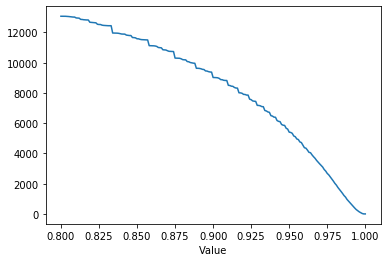

In [345]:
df2["LOSS"].plot()

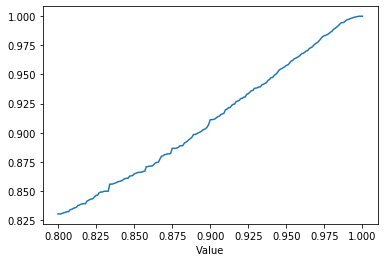

In [346]:
df2["PERCENTSAVED"].plot()

In [353]:


# .to_excel("1.xlsx")

,TOTAL,last_date,picture,clone,graphic,deleted,technical,graphicone_search,graphicone_feed,deleted_from_analytics,validated,year,ALGO_MAIN,ALGO_Picture,ALGO_Tech,ALGO_Graphic,ALGO_MAIN_2
004nino,8,2020-04-03 01:41:25,7,0,1,0,0,1,0,0,0,2020,0.875000,0.875000,0.0,0.125000,0.0
007thirty,54,2020-01-28 18:23:16,44,1,3,3,0,0,0,0,0,2020,0.870370,0.936170,0.0,0.055556,0.0
00bb263079e14e7,156,2020-04-29 11:44:32,143,0,3,1,0,0,1,0,0,2020,0.923077,0.979452,0.0,0.019231,0.0
020trader,29,2020-04-22 09:41:55,20,1,4,1,0,0,1,0,0,2020,0.724138,0.833333,0.0,0.137931,0.0
0deflation,301,2020-05-28 01:13:23,27,76,260,108,0,36,3,6,3,2020,0.448505,0.094077,0.0,0.863787,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ztrk_muzaffer,31,2020-03-26 15:06:59,27,1,1,0,0,0,0,0,0,2020,0.870968,0.964286,0.0,0.032258,0.0
zuzuku,14,2020-04-30 06:37:22,13,1,1,0,0,0,0,0,0,2020,0.928571,0.928571,0.0,0.071429,0.0
zxc098xxx,30,2020-04-27 20:03:21,28,2,2,0,0,0,0,0,0,2020,0.933333,0.933333,0.0,0.066667,0.0
zz_zigurds,12,2020-01-13 18:46:02,10,0,1,1,0,0,0,0,0,2020,0.916667,0.909091,0.0,0.083333,0.0


In [270]:
accounts_for_remove_2.reset_index()[accounts_for_remove_2.reset_index()["index"]=="ft"]

,index,TOTAL,last_date,picture,clone,graphic,deleted,technical,graphicone_search,graphicone_feed,deleted_from_analytics,validated,year,ALGO_MAIN,ALGO_Picture,ALGO_Tech,ALGO_Graphic,ALGO_MAIN_2


In [234]:
accounts_for_remove_2.graphicone_search.sum()

11297

In [189]:
accounts_for_remove_2[(accounts_for_remove_2["ALGO_Picture"] < 0.7) & accounts_for_remove_2["ALGO_Picture"] > 0].graphicone_search.sum()

8027

In [196]:

accounts_for_remove_2[(accounts_for_remove_2["ALGO_Tech"] < 0.4) & accounts_for_remove_2["ALGO_Tech"] > 0].graphicone_search.sum()

1305

In [201]:
def algo_checker(columnName, value):
    print(accounts_for_remove_2[accounts_for_remove_2[columnName] > 0].graphicone_search.sum())
    print(accounts_for_remove_2[(accounts_for_remove_2[columnName] > value) & accounts_for_remove_2[columnName] > 0].graphicone_search.sum())

In [206]:
algo_checker("ALGO_Tech", 0.2)

1324
51


In [235]:
accounts_for_remove_2.to_excel("accounts_for_remove_2_clean.xlsx")

In [207]:
accounts_for_remove_2[accounts_for_remove_2["ALGO"] < 0.7]

,TOTAL,last_date,picture,clone,graphic,deleted,technical,graphicone_search,graphicone_feed,deleted_from_analytics,validated,year,ALGO,ALGO_MAIN,ALGO_Picture,ALGO_Tech
0deflation,301,2020-05-28 01:13:23,27,76,260,108,0,36,3,6,3,2020,0.448505,0.448505,0.094077,0.0
0l0ll00ll0l0,29,2020-01-02 08:08:27,13,6,14,5,0,0,0,0,0,2020,0.620690,0.620690,0.481481,0.0
0xproject,6,2020-03-09 18:24:30,2,0,1,0,0,0,0,0,0,2020,0.333333,0.333333,0.666667,0.0
0xstark,14,2020-04-30 16:02:29,6,1,4,1,0,1,0,0,0,2020,0.500000,0.500000,0.600000,0.0
100_fornybart,2,2020-01-23 14:42:01,1,0,0,0,0,0,0,0,0,2020,0.500000,0.500000,1.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zortrades,79,2020-04-09 10:25:32,29,2,35,4,0,0,0,0,0,2020,0.417722,0.417722,0.453125,0.0
zowism,24,2020-05-11 21:34:07,16,6,7,0,0,1,0,0,0,2020,0.666667,0.666667,0.695652,0.0
zschneeweiss,431,2020-05-27 07:25:03,249,13,101,17,0,48,8,5,0,2020,0.617169,0.617169,0.711429,0.0
zseward,41,2020-04-26 14:08:30,18,14,19,1,0,2,1,1,0,2020,0.463415,0.463415,0.486486,0.0


In [159]:
accounts_for_remove_2[(accounts_for_remove_2["ALGO"] <= 0.5) | ((accounts_for_remove_2.graphicone_search > 1) | (accounts_for_remove_2.graphicone_feed > 1))]

,TOTAL,last_date,picture,clone,graphic,deleted,technical,graphicone_search,graphicone_feed,deleted_from_analytics,validated,year,ALGO
0deflation,301,2020-05-28 01:13:23,27,76,260,108,0,36,3,6,3,2020,0.448505
0xproject,6,2020-03-09 18:24:30,2,0,1,0,0,0,0,0,0,2020,0.333333
0xstark,14,2020-04-30 16:02:29,6,1,4,1,0,1,0,0,0,2020,0.500000
100_fornybart,2,2020-01-23 14:42:01,1,0,0,0,0,0,0,0,0,2020,0.500000
149mh,18,2020-03-20 11:25:22,8,4,8,1,0,0,0,0,0,2020,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
zmansenrgybrain,54,2020-05-19 01:33:07,10,1,21,8,0,1,1,1,0,2020,0.333333
zorinaq,21,2020-05-28 04:39:03,10,0,9,5,0,2,0,0,0,2020,0.714286
zortrades,79,2020-04-09 10:25:32,29,2,35,4,0,0,0,0,0,2020,0.417722
zschneeweiss,431,2020-05-27 07:25:03,249,13,101,17,0,48,8,5,0,2020,0.617169


In [ ]:
#УДАЛЯЕМ ТЕ КОТОРЫЕ ЕСТЬ В ФИДЕ И СЕРЧЕ

In [ ]:
#УДАЛЯЕМ ЛИШНИЕ КОЛОНКИ
# accounts_for_remove_2 = accounts_for_remove[[col for col in accounts_for_remove.columns if col not in excess_columns]].copy()
#УДАЛЯЕМ ТЕ КОТОРЫЕ ЕСТЬ В ФИДЕ И СЕРЧЕ
# accounts_for_remove_2 = accounts_for_remove_2[(np.isnan(accounts_for_remove_2.graphicone_search)&np.isnan(accounts_for_remove_2.graphicone_feed)&np.isnan(accounts_for_remove_2.validated))]
# accounts_for_remove_2 = accounts_for_remove_2[[col for col in accounts_for_remove_2.columns if col not in ["graphicone_search", "graphicone_feed", "validated"]]].copy()

# # проверять связь есть в фиде и серче и старые

# accounts_for_remove_2 = accounts_for_remove_2.reset_index()
# accounts_for_remove_2['index'] = accounts_for_remove_2["index"].apply(lambda x: x.lower())
# accounts_for_remove_2 = accounts_for_remove_2.set_index('index')
# accounts_for_remove_2 = accounts_for_remove_2.fillna(0)
# accounts_for_remove_2.to_excel("accounts_for_remove_clean_2_new.xlsx")
# accounts_for_remove_2

/home/ubuntu/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
